# Multiple Linear regression

Linear regression is a technique used to predict the value of a variable based on it's reationship with another variable - this is a simple linear regression. Thus, in predicting a house price, one factor to consider is the size of the house. However, there are other factors that will factor into the price of a home, such as location, air quality, demographics, parking, school availablity, local public transport, etc.

When making predictions for house price, our dependent variable, we'll want to use multiple independent variables. To do this, we'll use **Multiple Linear Regression**.

Multiple Linear Regression uses two or more independent variables to predict the values of the dependent variable. It is based on the following equation:

![Multiple Linear Regression](img/multiple-linear-regression-1.png)

In the folllowing plot, we used size (ft²) and building age (years) as independent variables to predict the rent ($).

When we have two independent variables, we can create a linear regression plane. We can now predict what the rent is by plugging in the independent variables and finding where they lie on the plane.

![Multiple Linear regression](img/multiple-linear-regression-2.png)

## Examining the StreetEasy Dataset

The dataset contains a sample of rental Listings from NYC, from June 2016.

It has 18 columns, some of which include:

 - `rental_id`: rental ID

 - `rent`: price of rent in dollars

 - `bedrooms`: number of bedrooms

 - `bathrooms`: number of bathrooms

 - `size_sqft`: size in square feet

 - `min_to_subway`: distance from subway station in minutes

 - `floor`: floor number
 
 - `building_age_yrs`: building's age in years

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [3]:
# import the data
streeteasy = pd.read_csv("https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/manhattan.csv")
brooklyn = pd.read_csv('https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/brooklyn.csv')
queens = pd.read_csv('https://raw.githubusercontent.com/Codecademy/datasets/master/streeteasy/queens.csv')

In [4]:
# fields with 1/0 -> True/False, except fee 0 for fee, 1 for no fee
df = pd.DataFrame(streeteasy)
print(df.head())

   rental_id   rent  bedrooms  bathrooms  size_sqft  min_to_subway  floor  \
0       1545   2550       0.0          1        480              9    2.0   
1       2472  11500       2.0          2       2000              4    1.0   
2       2919   4500       1.0          1        916              2   51.0   
3       2790   4795       1.0          1        975              3    8.0   
4       3946  17500       2.0          2       4800              3    4.0   

   building_age_yrs  no_fee  has_roofdeck  has_washer_dryer  has_doorman  \
0                17       1             1                 0            0   
1                96       0             0                 0            0   
2                29       0             1                 0            1   
3                31       0             0                 0            1   
4               136       0             0                 0            1   

   has_elevator  has_dishwasher  has_patio  has_gym       neighborhood  \
0     

In [5]:
# dataframe that has the following columns
x = df[['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']]

# dataframe based on the rent column
y = df[['rent']]

In [6]:
# split the data into training_set and test_set(used to evaluate the model), usually 80/20% split
# train_size, test_size set between 0-1, random_state(optional) seed used by the random number generator
# test set provides an unbiased evaluation of the model
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=6)

In [7]:
# examine the shape(dimensions of the arrays) of the 4 datasets (rows x columns)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2831, 14)
(708, 14)
(2831, 1)
(708, 1)


In [8]:
# build the model
model = LinearRegression()
model.fit(x_train, y_train)

# calculate predicted values
y_predict = model.predict(x_test)

Text(0,0.5,'Predicted rent($)')

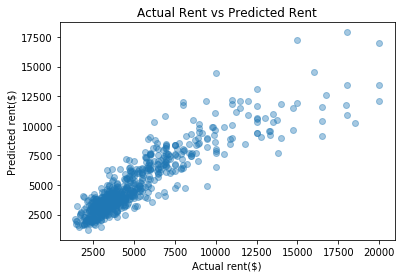

In [13]:
# visulaize results using Matplotlib by plotting 
# predicted rent (y_predict) y-axis vs actual rent(y_test) x-axis
plt.scatter(y_test, y_predict, alpha=0.4)

plt.title("Actual Rent vs Predicted Rent")
plt.xlabel("Actual rent($)")
plt.ylabel("Predicted rent($)")

### MLR Equation

The equation for multiple linear regression that uses two independent variables is:

![MLR Equation](img/multiple-linear-regression-3.png)

Since multiple linear regression can use any number of independent variables, its general equation becomes:

![MLR Equation](img/multiple-linear-regression-4.png)

Here, m1, m2, m3, ... mn refer to the coefficients, b refers to the intercept that you want to find, x are the independent variables, and y is the dependent variables. You can plug these values back into the equation to compute the predicted y values.

The .fit() method gives the model generates these two variables:

 - `.coef_`, which contains the coefficients, `model.coef_`
 - `.intercept_`, which contains the intercept, `model.intercept_`
 
Coefficients are most helpful in determining which independent variable carries more weight. For example, a coefficient of -1.345 will impact the rent more than a coefficient of 0.238, with the former impacting prices negatively and latter positively. 

In [14]:
print(model.coef_)
print(model.intercept_)

[[-302.73009383 1199.3859951     4.79976742  -24.28993151   24.19824177
    -7.58272473 -140.90664773   48.85017415  191.4257324  -151.11453388
    89.408889    -57.89714551  -19.31948556  -38.92369828]]
[-344.68587986]


In this particular example we used 14 variables from the dataset(the`x` dataframe), so there are 14 coefficients. To see if any of these features impact the rent negatively, plot the different features against the rent.

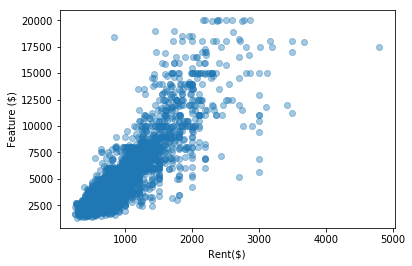

In [16]:
# scatter plot of size_sqft vs rent
plt.ylabel('Rent($)')
plt.xlabel('Feature ($)')

plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)

Text(0.5,0,'Feature ($)')

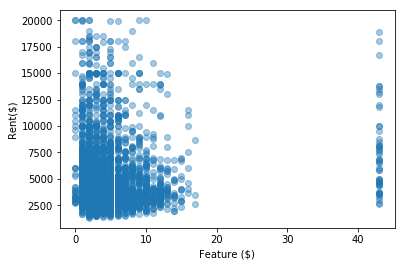

In [18]:
plt.scatter(df[['min_to_subway']], df[['rent']], alpha=0.4)
plt.ylabel('Rent($)')
plt.xlabel('Feature ($)')

Text(0.5,0,'Feature ($)')

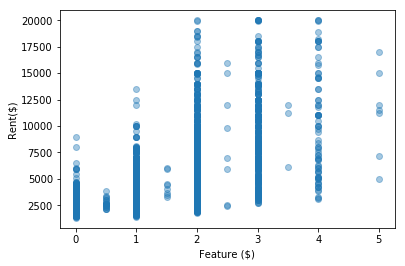

In [19]:
plt.scatter(df[['bedrooms']], df[['rent']], alpha=0.4)
plt.ylabel('Rent($)')
plt.xlabel('Feature ($)')

Text(0.5,0,'Feature ($)')

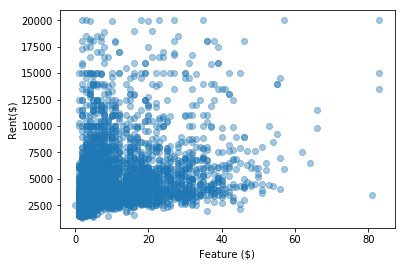

In [21]:
plt.scatter(df[['floor']], df[['rent']], alpha=0.4)
plt.ylabel('Rent($)')
plt.xlabel('Feature ($)')

Text(0.5,0,'Feature ($)')

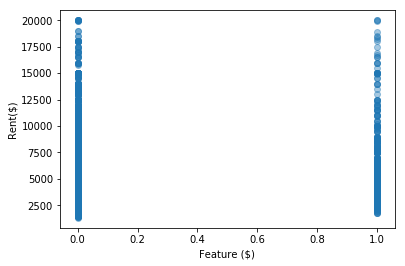

In [30]:
plt.scatter(df[['has_gym']], df[['rent']], alpha=0.4)
plt.ylabel('Rent($)')
plt.xlabel('Feature ($)')

In regression, the independent variables will either have a positive linear relationship to the dependent variable, a negative linear relationship, or no relationship. A negative linear relationship means that as X values increase, Y values will decrease. Similarly, a positive linear relationship means that as X values increase, Y values will also increase.

Graphically, when you see a downward trend, it means a negative linear relationship exists. When you find an upward trend, it indicates a positive linear relationship. Here are two graphs indicating positive and negative linear relationships:

![MLR Equation](img/multiple-linear-regression-5.png)

## Using Residual Analysis to Evaluate the model's Accuracy

The `residual` or `e` is the difference between the actual y (rent) and the predicted y value (predicted rent). `sklearn`'s `linear_model.Linearregression` comes with the `.score()` method that returns the `coefficient of determination` or `R^2` of the prediction.

`R^2` is the percentage variation in y explained by all the x variables together.

For example, say we are trying to predict rent based on the 'size_sqft' and the 'bedrooms' in the apartment and the `R^2` for our model is 0.72 — that means that all the x variables (square feet and number of bedrooms) together explain 72% variation in y (rent).

Now let's say we add another x variable, 'building's age', to our model. By adding this third relevant x variable, the `R^2` is expected to go up. Let say the new`R^2` is 0.95. This means that square feet, number of bedrooms and age of the building together explain 95% of the variation in the rent.

The best possible `R^2` is 1.00 (and it can be negative because the model can be arbitrarily worse). Usually, a `R^2` of 0.70 is considered good. A value of 0 would indicate that the model fails to accurately model the data at all.

In [31]:
# calculate the mean squared error regression loss for the training set.
print(model.score(x_train, y_train))

# calculate the mean squared error regression loss for the testing set
print(model.score(x_test, y_test))

0.7725460559817883
0.8050371975357681


The scores for the 3 boroghs are:

Manhattan
Train score: 0.772546055982
Test score:  0.805037197536

Brooklyn
Train score: 0.613221453798
Test score:  0.584349923873

Queens
Train score: 0.665836031009
Test score:  0.665170319781

Remove some of the features that don't have strong correlations and see if your scores improved!

Text(0.5,1,'Actual Rent vs Predicted Rent')

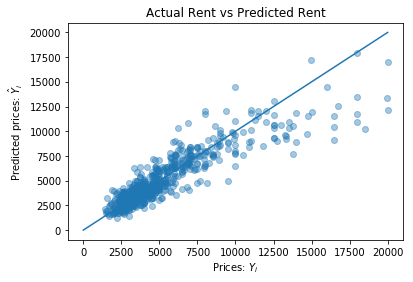

In [32]:
plt.scatter(y_test, y_predict, alpha=0.4)
plt.plot(range(20000), range(20000))

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Actual Rent vs Predicted Rent")

### Summary

1. Multiple Linear Regression uses two or more variables to make predictions about another variable

2. Multiple linear regression uses a set of independent variables and a dependent variable. It uses these variables to learn how to find optimal parameters. It takes a labeled dataset and learns from it. Once we confirm that it's learned correctly, we can then use it to make predictions by plugging in new x values.

3. We can use scikit-learn's `LinearRegression()` to perform multiple linear regression.

4. Residual Analysis is used to evaluate the regression model's accuracy. In other words, it's used to see if the model has learned the coefficients correctly.

5. Scikit-learn's `linear_model.LinearRegression` comes with a `.score()` method that returns the coefficient of determination `R^2` of the prediction. The best score is 1.0.

Check out the following [rent predictor](https://s3.us-east-2.amazonaws.com/codecademy-content-sites/streeteasy/rent.html) based on this example.